<a href="https://colab.research.google.com/github/Saulrega/neural-networs-professional/blob/main/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget --no-check-certificate https://storage.googleapis.com/platzi-tf2/sign-language-img.zip \
    -O /tmp/sign-language-img.zip

--2022-04-13 17:21:48--  https://storage.googleapis.com/platzi-tf2/sign-language-img.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.147.128, 142.250.125.128, 142.250.136.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.147.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24265584 (23M) [application/zip]
Saving to: ‘/tmp/sign-language-img.zip’

/tmp/sign-language- 100%[===================>]  23.14M  91.1MB/s    in 0.3s    

2022-04-13 17:21:49 (91.1 MB/s) - ‘/tmp/sign-language-img.zip’ saved [24265584/24265584]



In [ ]:
import os
import zipfile

In [ ]:
local_zip = "/tmp/sign-language-img.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall("/tmp/sign-language-img")
zip_ref.close()

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import string
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_dir = '/tmp/sign-language-img/Train'
test_dir = '/tmp/sign-language-img/Test'

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255, validation_split= 0.2)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (28, 28),
    batch_size = 128,
    class_mode = "categorical",
    color_mode = "grayscale",
    subset = "training"
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (28, 28),
    batch_size = 128,
    class_mode = "categorical",
    color_mode = "grayscale",
    subset = "validation"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (28, 28),
    batch_size = 128,
    class_mode = "categorical",
    color_mode = "grayscale"
)

Found 27455 images belonging to 24 classes.
Found 1425 images belonging to 24 classes.
Found 7172 images belonging to 24 classes.


In [ ]:
classes = [char for char in string.ascii_uppercase if char != "J" if char != "Z"]

In [ ]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 5, figsize = (10, 10))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img[:,:,0])
    ax.axis("off")
  plt.tight_layout()
  plt.show()

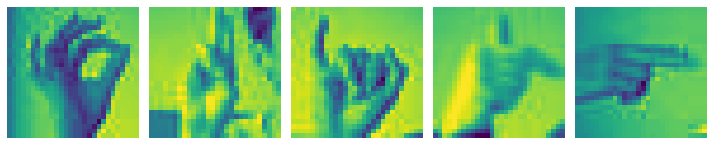

In [ ]:
sample_training_images, _= next(train_generator)
plotImages(sample_training_images[:5])

In [ ]:
model_base = tf.keras.models.Sequential([
                                         tf.keras.layers.Flatten(input_shape=(28,28,1)),
                                         tf.keras.layers.Dense(256, activation='relu'),
                                         tf.keras.layers.Dense(128, activation='relu'),
                                         tf.keras.layers.Dense(len(classes), activation='softmax'),
])

In [ ]:
model_base.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 24)                3096      
                                                                 
Total params: 236,952
Trainable params: 236,952
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_base.compile(optimizer='Adam', loss='categorical_crossentropy', metrics= ['accuracy'])

history = model_base.fit(
    train_generator,
    epochs=20,
    validation_data = validation_generator
)

Epoch 1/20
215/215 [==============================] - 12s 44ms/step - loss: 2.1760 - accuracy: 0.3534 - val_loss: 1.7096 - val_accuracy: 0.5102
Epoch 2/20
215/215 [==============================] - 9s 42ms/step - loss: 1.2234 - accuracy: 0.6342 - val_loss: 1.3277 - val_accuracy: 0.5951
Epoch 3/20
215/215 [==============================] - 10s 46ms/step - loss: 0.8713 - accuracy: 0.7390 - val_loss: 1.2240 - val_accuracy: 0.6246
Epoch 4/20
215/215 [==============================] - 9s 42ms/step - loss: 0.6515 - accuracy: 0.8072 - val_loss: 1.0816 - val_accuracy: 0.6639
Epoch 5/20
215/215 [==============================] - 9s 43ms/step - loss: 0.4912 - accuracy: 0.8578 - val_loss: 1.0221 - val_accuracy: 0.6779
Epoch 6/20
215/215 [==============================] - 9s 42ms/step - loss: 0.3589 - accuracy: 0.9003 - val_loss: 1.0263 - val_accuracy: 0.6919
Epoch 7/20
215/215 [==============================] - 9s 42ms/step - loss: 0.2828 - accuracy: 0.9238 - val_loss: 1.0368 - val_accuracy: 0.70

In [ ]:
results = model_base.evaluate(test_generator)

57/57 [==============================] - 2s 41ms/step - loss: 1.2021 - accuracy: 0.7606


In [ ]:
def visualizacion_resultados(history):
  epochs = [i for i in range(20)]
  fig, ax = plt.subplots(1,2)
  train_acc = history.history["accuracy"]
  train_loss = history.history["loss"]
  val_acc = history.history["val_accuracy"]
  val_loss = history.history["val_loss"]
  fig.set_size_inches(16, 9)

  ax[0].plot(epochs, train_acc, "go-", label =" Entrenamiento accuracy")
  ax[0].plot(epochs, val_acc, "ro-", label= "Validacion accuracy")
  ax[0].set_title("Entrenamiento & validación accuracy")
  ax[0].legend()
  ax[0].set_xlabel("Epochs")
  ax[0].set_ylabel("Accuracy")

  ax[1].plot(epochs, train_loss, "go-", label =" Entrenamiento Loss")
  ax[1].plot(epochs, val_loss, "ro-", label= "Validacion Loss")
  ax[1].set_title("Entrenamiento & validación Loss")
  ax[1].legend()
  ax[1].set_xlabel("Epochs")
  ax[1].set_ylabel("Loss")

  plt.show()


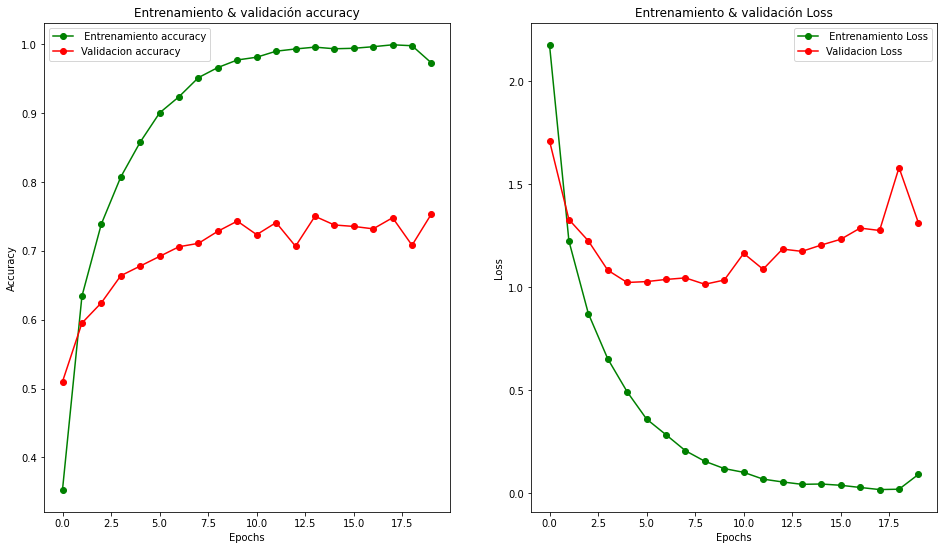

In [ ]:
visualizacion_resultados(history)

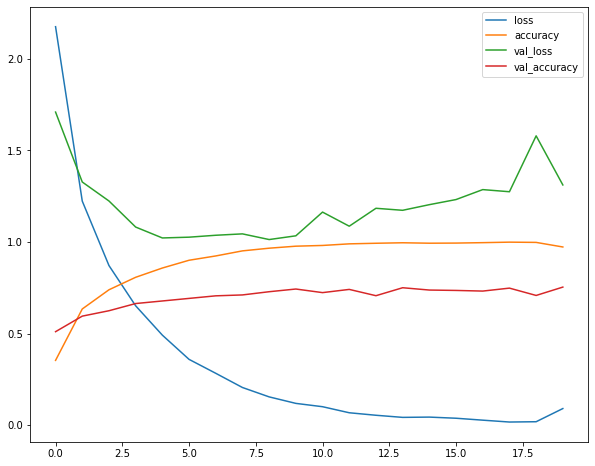

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(10,8))

In [ ]:
from tensorflow.keras import regularizers
model_optimizer = tf.keras.models.Sequential([
                                         tf.keras.layers.Flatten(input_shape=(28,28,1)),
                                         tf.keras.layers.Dense(256, kernel_regularizer = regularizers.l2(1e-5), activation='relu'),
                                         tf.keras.layers.Dropout(.2),
                                         tf.keras.layers.Dense(128, kernel_regularizer = regularizers.l2(1e-5), activation='relu'),
                                         tf.keras.layers.Dropout(.2),
                                         tf.keras.layers.Dense(len(classes), activation='softmax'),
])
model_optimizer.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 24)                3096      
                                                                 
Total params: 236,952
Trainable params: 236,952
Non-tr

In [ ]:
model_optimizer.compile(optimizer='Adam', loss='categorical_crossentropy', metrics= ['accuracy'])

history_optimizer = model_optimizer.fit(
    train_generator,
    epochs=20,
    validation_data = validation_generator
)

Epoch 1/20
215/215 [==============================] - 10s 44ms/step - loss: 2.5265 - accuracy: 0.2286 - val_loss: 1.7691 - val_accuracy: 0.4533
Epoch 2/20
215/215 [==============================] - 9s 43ms/step - loss: 1.6209 - accuracy: 0.4647 - val_loss: 1.4155 - val_accuracy: 0.5446
Epoch 3/20
215/215 [==============================] - 9s 43ms/step - loss: 1.2569 - accuracy: 0.5757 - val_loss: 1.1800 - val_accuracy: 0.6119
Epoch 4/20
215/215 [==============================] - 9s 43ms/step - loss: 1.0422 - accuracy: 0.6488 - val_loss: 1.1256 - val_accuracy: 0.6449
Epoch 5/20
215/215 [==============================] - 9s 42ms/step - loss: 0.8714 - accuracy: 0.7040 - val_loss: 1.0380 - val_accuracy: 0.6547
Epoch 6/20
215/215 [==============================] - 9s 43ms/step - loss: 0.7596 - accuracy: 0.7441 - val_loss: 0.9013 - val_accuracy: 0.7207
Epoch 7/20
215/215 [==============================] - 9s 43ms/step - loss: 0.6601 - accuracy: 0.7761 - val_loss: 0.9461 - val_accuracy: 0.714

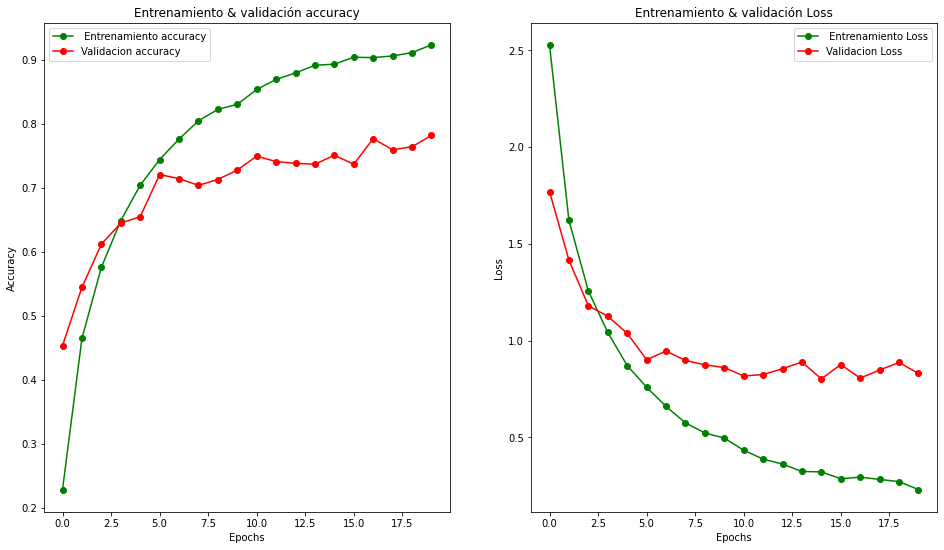

In [ ]:
visualizacion_resultados(history_optimizer)

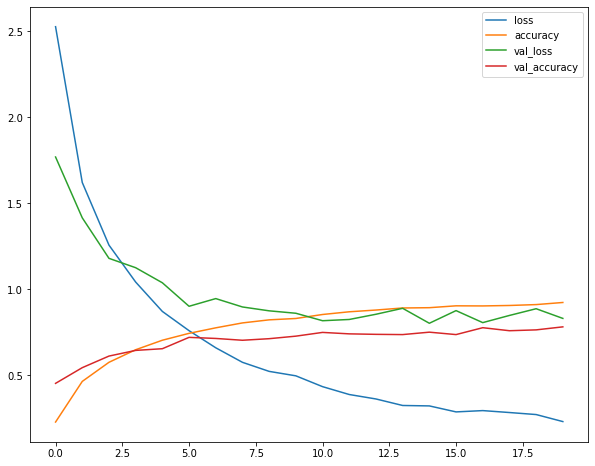

In [ ]:
pd.DataFrame(history_optimizer.history).plot(figsize=(10,8))

In [ ]:
model_convolutional = tf.keras.models.Sequential([
                                         tf.keras.layers.Conv2D(75, (3,3), activation='relu', input_shape=(28,28,1)),
                                         tf.keras.layers.MaxPool2D((2,2)),
                                         tf.keras.layers.Flatten(),
                                         tf.keras.layers.Dense(256, kernel_regularizer = regularizers.l2(1e-5), activation='relu'),
                                         tf.keras.layers.Dropout(.2),
                                         tf.keras.layers.Dense(128, kernel_regularizer = regularizers.l2(1e-5), activation='relu'),
                                         tf.keras.layers.Dropout(.2),
                                         tf.keras.layers.Dense(len(classes), activation='softmax'),
])
model_convolutional.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 75)        750       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 75)       0         
 )                                                               
                                                                 
 flatten_2 (Flatten)         (None, 12675)             0         
                                                                 
 dense_6 (Dense)             (None, 256)               3245056   
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                      

In [ ]:
model_convolutional.compile(optimizer='Adam', loss='categorical_crossentropy', metrics= ['accuracy'])

history_convolutional = model_convolutional.fit(
    train_generator,
    epochs=20,
    validation_data = validation_generator
)

Epoch 1/20
215/215 [==============================] - 45s 207ms/step - loss: 1.6828 - accuracy: 0.4854 - val_loss: 0.8147 - val_accuracy: 0.7179
Epoch 2/20
215/215 [==============================] - 45s 207ms/step - loss: 0.3828 - accuracy: 0.8876 - val_loss: 0.6264 - val_accuracy: 0.7867
Epoch 3/20
215/215 [==============================] - 45s 211ms/step - loss: 0.1470 - accuracy: 0.9654 - val_loss: 0.5851 - val_accuracy: 0.8330
Epoch 4/20
215/215 [==============================] - 45s 207ms/step - loss: 0.0833 - accuracy: 0.9847 - val_loss: 0.6235 - val_accuracy: 0.8498
Epoch 5/20
215/215 [==============================] - 45s 210ms/step - loss: 0.0620 - accuracy: 0.9902 - val_loss: 0.6414 - val_accuracy: 0.8470
Epoch 6/20
215/215 [==============================] - 43s 202ms/step - loss: 0.0489 - accuracy: 0.9946 - val_loss: 0.6391 - val_accuracy: 0.8625
Epoch 7/20
215/215 [==============================] - 45s 207ms/step - loss: 0.0446 - accuracy: 0.9955 - val_loss: 0.6847 - val_ac

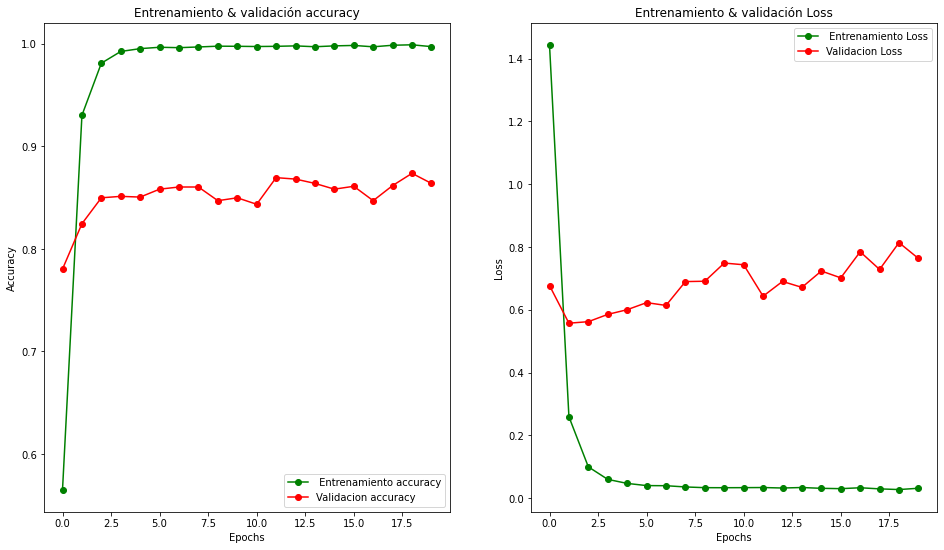

In [ ]:
visualizacion_resultados(history_convolutional)

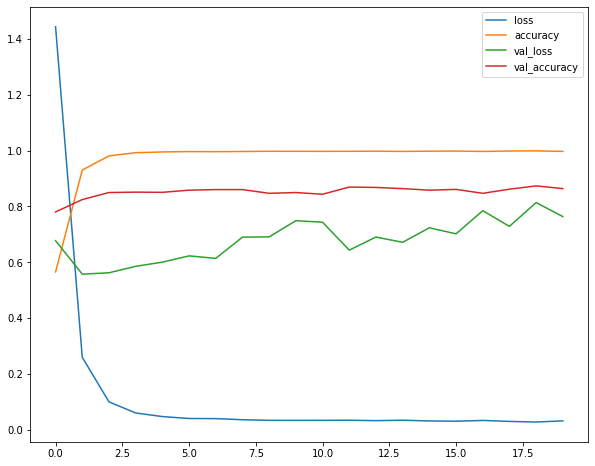

In [ ]:
pd.DataFrame(history_convolutional.history).plot(figsize=(10,8))

In [ ]:
model_callbacks = tf.keras.models.Sequential([
                                         tf.keras.layers.Conv2D(75, (3,3), activation='relu', input_shape=(28,28,1)),
                                         tf.keras.layers.MaxPool2D((2,2)),
                                         tf.keras.layers.Flatten(),
                                         tf.keras.layers.Dense(256, kernel_regularizer = regularizers.l2(1e-5), activation='relu'),
                                         tf.keras.layers.Dropout(.2),
                                         tf.keras.layers.Dense(128, kernel_regularizer = regularizers.l2(1e-5), activation='relu'),
                                         tf.keras.layers.Dropout(.2),
                                         tf.keras.layers.Dense(len(classes), activation='softmax'),
])
model_callbacks.summary()
model_callbacks.compile(optimizer='Adam', loss='categorical_crossentropy', metrics= ['accuracy'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 75)        750       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 75)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 12675)             0         
                                                                 
 dense_12 (Dense)            (None, 256)               3245056   
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                      

In [ ]:
from tensorflow.keras.callbacks import Callback

class TrainingCallback(Callback):
  def on_epoch_end(self,epoch, logs = {}):
    if logs.get('accuracy') > .95:
      print('Lo logramosm nuestro modelo llego a 95%, detenemos el entrenamiento')
      self.model.stop_training = True
  




In [ ]:
callback = TrainingCallback()


history_callback = model_callbacks.fit(
    train_generator,
    epochs=20,
    callbacks = [callback],
    validation_data = validation_generator
)

Epoch 1/20
215/215 [==============================] - 12s 52ms/step - loss: 1.9787 - accuracy: 0.3963 - val_loss: 0.9701 - val_accuracy: 0.6758
Epoch 2/20
215/215 [==============================] - 10s 47ms/step - loss: 0.5469 - accuracy: 0.8263 - val_loss: 0.6528 - val_accuracy: 0.7888
Epoch 3/20
215/215 [==============================] - 10s 47ms/step - loss: 0.2302 - accuracy: 0.9356 - val_loss: 0.5881 - val_accuracy: 0.8154
Epoch 4/20
215/215 [==============================] - 10s 46ms/step - loss: 0.1263 - accuracy: 0.9714 - val_loss: 0.6573 - val_accuracy: 0.8253


In [ ]:
def get_model():
  model = tf.keras.models.Sequential([
                                          tf.keras.layers.Conv2D(75, (3,3), activation='relu', input_shape=(28,28,1)),
                                          tf.keras.layers.MaxPool2D((2,2)),
                                          tf.keras.layers.Flatten(),
                                          tf.keras.layers.Dense(256, kernel_regularizer = regularizers.l2(1e-5), activation='relu'),
                                          tf.keras.layers.Dropout(.2),
                                          tf.keras.layers.Dense(128, kernel_regularizer = regularizers.l2(1e-5), activation='relu'),
                                          tf.keras.layers.Dropout(.2),
                                          tf.keras.layers.Dense(len(classes), activation='softmax'),
  ])
  return model

model_early = get_model() 
model_early.summary()
model_early.compile(optimizer='Adam', loss='categorical_crossentropy', metrics= ['accuracy'])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 75)        750       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 13, 75)       0         
 2D)                                                             
                                                                 
 flatten_7 (Flatten)         (None, 12675)             0         
                                                                 
 dense_21 (Dense)            (None, 256)               3245056   
                                                                 
 dropout_12 (Dropout)        (None, 256)               0         
                                                                 
 dense_22 (Dense)            (None, 128)               32896     
                                                      

In [ ]:
callback_early = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience=3, mode='auto')

In [ ]:
history_early = model_early.fit(
    train_generator,
    epochs=20,
    callbacks = [callback_early],
    validation_data = validation_generator6
)

Epoch 1/20
215/215 [==============================] - 11s 48ms/step - loss: 1.7954 - accuracy: 0.4564 - val_loss: 0.8528 - val_accuracy: 0.7172
Epoch 2/20
215/215 [==============================] - 10s 48ms/step - loss: 0.4345 - accuracy: 0.8695 - val_loss: 0.6098 - val_accuracy: 0.8021
Epoch 3/20
215/215 [==============================] - 10s 46ms/step - loss: 0.1742 - accuracy: 0.9561 - val_loss: 0.5689 - val_accuracy: 0.8435
Epoch 4/20
215/215 [==============================] - 10s 46ms/step - loss: 0.0943 - accuracy: 0.9807 - val_loss: 0.5951 - val_accuracy: 0.8358
Epoch 5/20
215/215 [==============================] - 10s 46ms/step - loss: 0.0682 - accuracy: 0.9887 - val_loss: 0.6357 - val_accuracy: 0.8379
Epoch 6/20
215/215 [==============================] - 10s 47ms/step - loss: 0.0562 - accuracy: 0.9915 - val_loss: 0.6549 - val_accuracy: 0.8379
Epoch 7/20
215/215 [==============================] - 10s 47ms/step - loss: 0.0483 - accuracy: 0.9941 - val_loss: 0.6311 - val_accuracy:

In [ ]:
!pip install -q -U keras-tuner
import kerastuner as kt
from tensorflow import keras

In [ ]:
def constructor_modelos(hp):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Conv2D(75, (3,3), activation= "relu", input_shape = (28, 28, 1)))
  model.add(tf.keras.layers.MaxPool2D((2,2)))
  model.add(tf.keras.layers.Flatten())

  hp_units = hp.Int("units", min_value = 32, max_value = 512, step = 32)
  model.add(tf.keras.layers.Dense(units=hp_units,activation = "relu", kernel_regularizer= regularizers.l2(1e-5)))
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.Dense(units=hp_units,activation = "relu", kernel_regularizer= regularizers.l2(1e-5)))
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.Dense(len(classes), activation = "softmax"))

  hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4])

  model.compile(optimizer = keras.optimizers.Adam(learning_rate=hp_learning_rate),loss = "categorical_crossentropy", metrics = ["accuracy"])

  return model

In [ ]:
tunner = kt.Hyperband(
    constructor_modelos,
    objective = "val_accuracy",
    max_epochs = 20,
    factor = 3,
    directory = "models/",
    project_name = "platzi-tunner"
)

INFO:tensorflow:Reloading Oracle from existing project models/platzi-tunner/oracle.json


In [ ]:
tunner.search(train_generator, epochs =20, validation_data = validation_generator)

best_hps = tunner.get_best_hyperparameters(num_trials =1)[0]

Trial 30 Complete [00h 03m 26s]
val_accuracy: 0.7873684167861938

Best val_accuracy So Far: 0.8799999952316284
Total elapsed time: 00h 41m 53s
INFO:tensorflow:Oracle triggered exit


In [ ]:
print(best_hps.get('units'))

512


In [ ]:
print(best_hps.get('learning_rate'))


0.001


In [ ]:
hypermodel = tunner.hypermodel.build(best_hps)

history_hypermodel = hypermodel.fit(
    train_generator,
    epochs=20,
    callbacks = [callback_early],
    validation_data = validation_generator
)

Epoch 1/20
215/215 [==============================] - 12s 51ms/step - loss: 1.1365 - accuracy: 0.6631 - val_loss: 0.6470 - val_accuracy: 0.8063
Epoch 2/20
215/215 [==============================] - 11s 49ms/step - loss: 0.1082 - accuracy: 0.9812 - val_loss: 0.6454 - val_accuracy: 0.8225
Epoch 3/20
215/215 [==============================] - 12s 54ms/step - loss: 0.0452 - accuracy: 0.9967 - val_loss: 0.7030 - val_accuracy: 0.8393
Epoch 4/20
215/215 [==============================] - 10s 47ms/step - loss: 0.0360 - accuracy: 0.9984 - val_loss: 0.7089 - val_accuracy: 0.8449
Epoch 5/20
215/215 [==============================] - 10s 48ms/step - loss: 0.0335 - accuracy: 0.9982 - val_loss: 0.6878 - val_accuracy: 0.8463
Epoch 6/20
215/215 [==============================] - 10s 48ms/step - loss: 0.0288 - accuracy: 0.9992 - val_loss: 0.7569 - val_accuracy: 0.8386
Epoch 7/20
215/215 [==============================] - 10s 47ms/step - loss: 0.0257 - accuracy: 0.9995 - val_loss: 0.7603 - val_accuracy:

ValueError: ignored

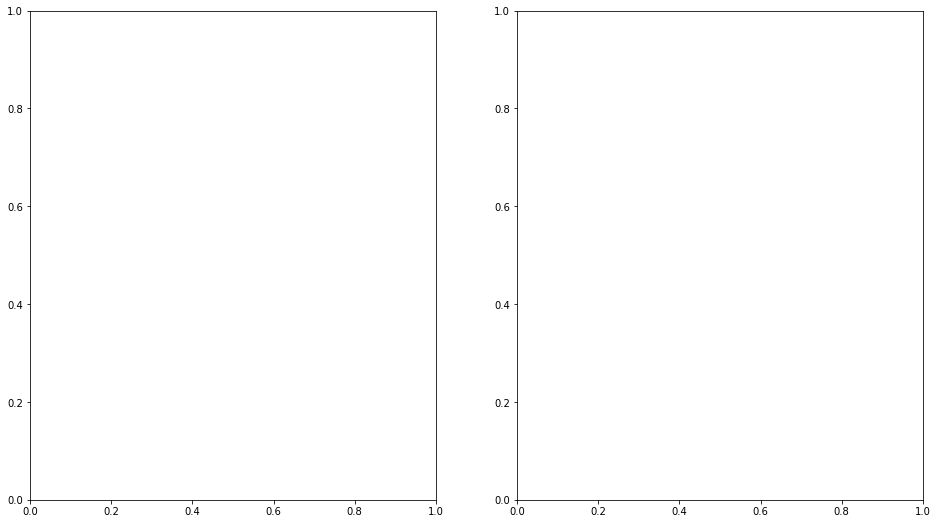

In [ ]:
visualizacion_resultados(history_hypermodel)

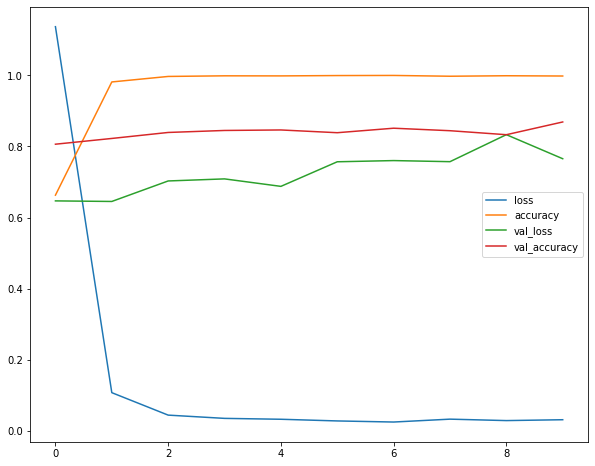

In [ ]:
pd.DataFrame(history_hypermodel.history).plot(figsize=(10,8))

In [ ]:
config_dict = hypermodel.get_config()

In [ ]:
model_same_config = tf.keras.Sequential.from_config(config_dict)

In [ ]:
model_same_config.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 75)        750       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 75)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 12675)             0         
                                                                 
 dense_3 (Dense)             (None, 512)               6490112   
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                      

In [ ]:
hypermodel.save('Hypermodel.h5')

In [ ]:
new_model= keras.models.load_model('Hypermodel.h5')

In [ ]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 75)        750       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 75)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 12675)             0         
                                                                 
 dense_3 (Dense)             (None, 512)               6490112   
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                      

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
model_weight = get_model()
model_weight.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 75)        750       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 75)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 12675)             0         
                                                                 
 dense_9 (Dense)             (None, 256)               3245056   
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                      

In [ ]:
model_weight.compile(optimizer = 'adam',loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
checkpoint_path = 'model_checkpoints/checkpoiint'
checkpoint_weights = ModelCheckpoint(
    filepath = checkpoint_path,
    frecuency = 'epoch',
    save_weights_only = True,
    verbose=1
)

In [ ]:
history_weight = model_weight.fit(
    train_generator,
    epochs=20,
    callbacks = [checkpoint_weights],
    validation_data = validation_generator
)

In [ ]:
visualizacion_resultados(history_weight)

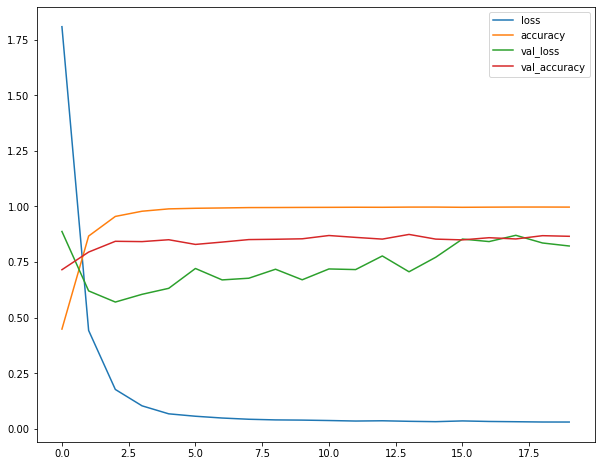

In [ ]:
pd.DataFrame(history_weight.history).plot(figsize=(10,8))

In [ ]:
model_weight.save_weights('model_manual/my_model')

In [ ]:
model_weights2 = get_model()
model_weights2.compile(optimizer = 'adam',loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
model_weights2.load_weights(checkpoint_path)
model_weights2.evaluate(test_generator)

57/57 [==============================] - 5s 86ms/step - loss: 0.7845 - accuracy: 0.8688


[0.7844521403312683, 0.8687953352928162]

In [ ]:
model_weight.evaluate(test_generator)

57/57 [==============================] - 2s 41ms/step - loss: 0.7845 - accuracy: 0.8688


[0.7844521403312683, 0.8687953352928162]

In [ ]:
checkpoint_path = 'model_checkpoints_complete'
checkpoint_weights = ModelCheckpoint(
    filepath = checkpoint_path,
    frecuency = 'epoch',
    save_weights_only = False,
    monitor='val_accuracy',
    save_best_only = True,
    verbose=1
)

In [ ]:
model_complete = get_model()
model_complete.compile(optimizer = 'adam',loss = "categorical_crossentropy", metrics = ["accuracy"])

history_complete = model_complete.fit(
    train_generator,
    epochs=20,
    callbacks = [checkpoint_weights],
    validation_data = validation_generator
)

In [ ]:
visualizacion_resultados(history_complete)


In [ ]:
pd.DataFrame(history_complete.history).plot(figsize=(10,8))

In [ ]:
model_complete.save('saved_model_complete/mymodel')

INFO:tensorflow:Assets written to: saved_model_complete/mymodel/assets


In [ ]:
model_complete2 = tf.keras.models.load_model('saved_model_complete/mymodel')

In [ ]:
model_complete2.evaluate(test_generator)

57/57 [==============================] - 3s 41ms/step - loss: 0.7584 - accuracy: 0.8504


[0.7584095597267151, 0.8503904342651367]

In [ ]:
!pip install pyyaml h5py

In [ ]:
model_complete2.save('my_model.h5')

In [ ]:
train_generator_resize = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 128,
    class_mode = "categorical",
    color_mode = "rgb",
    subset = "training"
)

validation_generator_resize = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150, 150),
    batch_size = 128,
    class_mode = "categorical",
    color_mode = "rgb",
    subset = "validation"
)

test_generator_resize = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150, 150),
    batch_size = 128,
    class_mode = "categorical",
    color_mode = "rgb"
)

Found 27455 images belonging to 24 classes.
Found 1425 images belonging to 24 classes.
Found 7172 images belonging to 24 classes.


In [ ]:
from tensorflow.keras.applications import inception_v3

pre_trained_model = inception_v3.InceptionV3(
    include_top = False,
    input_tensor = tf.keras.layers.Input(shape=(150,150, 3))
)

for layer in pre_trained_model.layers:
  layer.trainable = False

pre_trained_model.summary()

87924736/87910968 [==============================] - 2s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_8 (Conv2D)              (None, 74, 74, 32)   864         ['input_2[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d_8[0][0]']               
 alization)                                                                                       
                      

In [ ]:
last_layer = pre_trained_model.get_layer('mixed7')
last_output = last_layer.output

In [ ]:
x = tf.keras.layers.Flatten()(last_output)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(.3)(x)
x = tf.keras.layers.Dense(len(classes), activation='softmax')(x)

model_keras = tf.keras.Model(pre_trained_model.input, x)

model_keras.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
model_keras.summary()

In [ ]:
history_keras = model_keras.fit(
    train_generator_resize,
    epochs =5,
    validation_data = validation_generator_resize
)

Epoch 1/5
215/215 [==============================] - 59s 246ms/step - loss: 0.1657 - accuracy: 0.9540 - val_loss: 0.0845 - val_accuracy: 0.9705
Epoch 2/5
215/215 [==============================] - 50s 230ms/step - loss: 0.0066 - accuracy: 0.9989 - val_loss: 0.0428 - val_accuracy: 0.9825
Epoch 3/5
215/215 [==============================] - 49s 230ms/step - loss: 0.0041 - accuracy: 0.9993 - val_loss: 0.0611 - val_accuracy: 0.9796
Epoch 4/5
215/215 [==============================] - 50s 230ms/step - loss: 0.0024 - accuracy: 0.9996 - val_loss: 0.0608 - val_accuracy: 0.9796
Epoch 5/5
215/215 [==============================] - 50s 230ms/step - loss: 0.0026 - accuracy: 0.9995 - val_loss: 0.0566 - val_accuracy: 0.9832


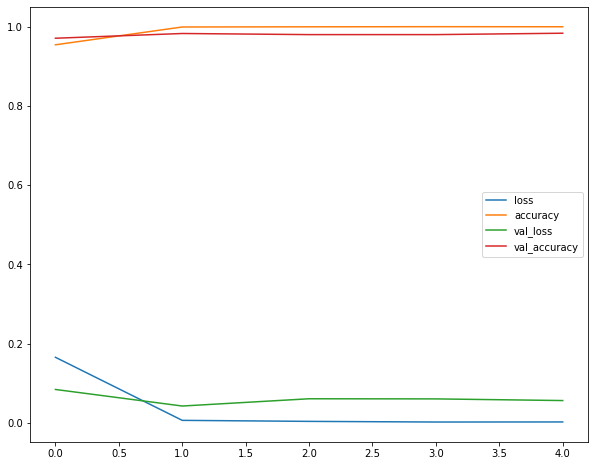

In [ ]:
pd.DataFrame(history_keras.history).plot(figsize=(10,8))

In [ ]:
results = model_keras.evaluate(test_generator_resize)
print(results)

57/57 [==============================] - 13s 224ms/step - loss: 0.0548 - accuracy: 0.9831
[0.05478893592953682, 0.9831288456916809]


In [ ]:
import tensorflow_hub as hub

In [ ]:
module_url = 'https://tfhub.dev/google/imagenet/mobilenet_v1_050_160/classification/4'

In [ ]:
model_hub = tf.keras.Sequential([
                                tf.keras.layers.InputLayer(input_shape=(150,150,3)),
                                hub.KerasLayer(module_url, trainable=False),
                                tf.keras.layers.Flatten(),
                                tf.keras.layers.Dense(128,activation='relu'),
                                tf.keras.layers.Dropout(rate=.3),
                                tf.keras.layers.Dense(len(classes), activation='softmax')
])
model_hub.build((None, 150,150,3))
model_hub.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              1343049   
                                                                 
 flatten_10 (Flatten)        (None, 1001)              0         
                                                                 
 dense_26 (Dense)            (None, 128)               128256    
                                                                 
 dropout_17 (Dropout)        (None, 128)               0         
                                                                 
 dense_27 (Dense)            (None, 24)                3096      
                                                                 
Total params: 1,474,401
Trainable params: 131,352
Non-trainable params: 1,343,049
_________________________________________________________________


In [ ]:
model_hub.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_hub = model_hub.fit(
    train_generator_resize,
    epochs =5,
    validation_data = validation_generator_resize
)

Epoch 1/5
215/215 [==============================] - 28s 119ms/step - loss: 1.9460 - accuracy: 0.3979 - val_loss: 1.0948 - val_accuracy: 0.6491
Epoch 2/5
215/215 [==============================] - 26s 118ms/step - loss: 1.0040 - accuracy: 0.6597 - val_loss: 0.7647 - val_accuracy: 0.7018
Epoch 3/5
215/215 [==============================] - 25s 114ms/step - loss: 0.7671 - accuracy: 0.7363 - val_loss: 0.5942 - val_accuracy: 0.8000
Epoch 4/5
215/215 [==============================] - 25s 114ms/step - loss: 0.6476 - accuracy: 0.7748 - val_loss: 0.5574 - val_accuracy: 0.8021
Epoch 5/5
215/215 [==============================] - 25s 117ms/step - loss: 0.5713 - accuracy: 0.8027 - val_loss: 0.5187 - val_accuracy: 0.8140


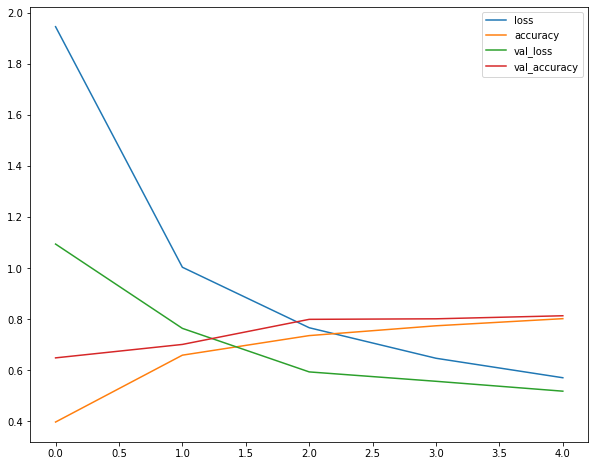

In [ ]:
pd.DataFrame(history_hub.history).plot(figsize=(10,8))

In [ ]:
results = model_hub.evaluate(test_generator_resize)
print(results)

57/57 [==============================] - 6s 110ms/step - loss: 0.5199 - accuracy: 0.8236
[0.5198783874511719, 0.8236196041107178]


In [ ]:
from tensorflow.python.keras.callbacks import TensorBoard
from time import time

In [ ]:
model_tensorboard = get_model()
model_tensorboard.compile(optimizer = 'adam',loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
callback_tensorboard = TensorBoard(log_dir="logs/{}".format(time()))

In [ ]:
history_tensorboard = model_tensorboard.fit(
    train_generator,
    epochs=20,
    callbacks = [callback_tensorboard],
    validation_data = validation_generator
)

In [ ]:
!tensorboard dev upload --logdir ./logs --name "Proyecto lenguaje de señas" --description "Resultados del modelo creado" --one_shot


***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./logs

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&state=OjouGAreXyGt5iNAcBceAZSmBJh8tk&prompt=consent&access_type=offline
Enter 